# Project 2 - Ames Housing Data and Housing Price Predictions

## 1. Problem:
Create a housing price model that will predict housing sale prices based on the features in the Ames Housing Dataset.

The data description can be found at : http://jse.amstat.org/v19n3/decock/DataDocumentation.txt.

## 2. Executive Summary

The data was imported via pandas, and checked for null values. A basic OLS regression was performed on scaled, intact, continuous numeric columns. Statistics for the OLS coefficients were generated, and the most promising coefficients were selected. From there, a basic model was generated from only the intact numeric columns. 

At this point, a polynomial expansion of the numeric features was generated and tested via a LASSO optimization. The LASSO model generated lower variance in the predictions, and the non-zero coefficients were noted and used on the next iteration of the model.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import missingno as msno
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pd.set_option('max_columns', 100, "max_rows", 100)
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('./datasets/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## 3. Exploratory Data Analysis

Here we will take a look at the data, and build a basic model from features that don't require much manipulation. 

First, let's get a good representation of the columns with NaNs.

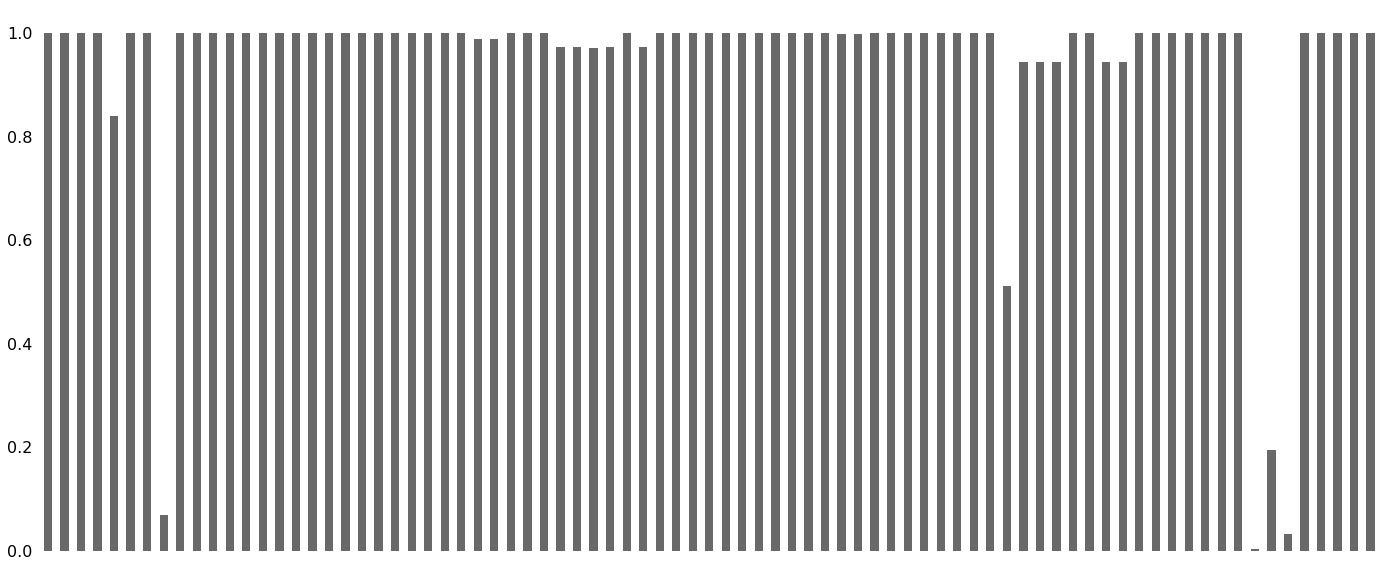

In [4]:
msno.bar(df)

In [5]:
# looks like we are missing a lot of data
# lets get a look at what that missing data is:

df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [6]:
df.columns[df.isnull().sum() > 0]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

In [7]:
# lets describe the numeric data:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [8]:
# it's to be expected that there are going to be some low outliers, 
# and we are missing the column "Sale Condition" that would help us
# account for some of these. So lets just drop the 3 lowest priced homes
# in the dataset

low_drop = list(df.nsmallest(3, 'SalePrice').index)
df.drop(index=low_drop, inplace=True)
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2048.000000,2.048000e+03,2048.000000,1718.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2026.000000,2047.000000,2047.000000,2047.000000,2047.000000,2048.000000,2048.000000,2048.000000,2048.000000,2046.000000,2046.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,1935.000000,2047.000000,2047.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,1474.990234,7.133097e+08,57.053223,69.054715,10064.269043,6.117676,5.564453,1971.767578,1984.229492,99.843534,442.706888,48.029311,568.119199,1058.855398,1165.078125,329.811523,5.520996,1500.410645,0.428152,0.063539,1.578125,0.371582,2.844727,1.042969,6.438965,0.591309,1978.747804,1.777235,473.746947,93.971191,47.371094,22.548828,2.595215,16.535645,2.401367,51.649902,6.219727,2007.773926,181705.844238
std,843.952256,1.886876e+08,42.839444,23.278427,6746.509455,1.419152,1.102356,30.155948,21.023681,175.050567,461.333264,165.111598,445.032606,448.989843,396.432443,425.795971,51.105842,500.012762,0.522800,0.251878,0.549237,0.501208,0.826592,0.209937,1.559184,0.638653,25.420832,0.764057,215.732444,128.593343,65.947337,59.849931,25.247901,57.412746,37.810135,573.810601,2.743124,1.311765,79074.916716
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35000.000000
25%,754.750000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.500000,880.000000,0.000000,0.000000,1131.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129900.000000
50%,1486.500000,5.354532e+08,50.000000,68.000000,9417.500000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,475.000000,996.000000,1093.000000,0.000000,0.000000,1445.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,2199.250000,9.071801e+08,70.000000,80.000000,11512.750000,7.000000,6.000000,2001.000000,2004.000000,161.750000,734.000000,0.000000,811.000000,1319.000000,1405.000000,694.250000,0.000000,1729.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [9]:
# let's just run a quick SM model to see which 
# of the numeric columns are worth keeping:

# first, lets drop columns that have null values
df_no_null = df.dropna(axis = 1)
df_no_null.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,Gd,TA,CBlock,GasA,Ex,Y,SBrkr,725,754,0,1479,2,1,3,1,Gd,6,Typ,0,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,913,1209,0,2122,2,1,4,1,Gd,8,Typ,1,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,TA,Gd,CBlock,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,3,1,Gd,5,Typ,0,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Gd,Y,SBrkr,744,700,0,1444,2,1,3,1,TA,7,Typ,0,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,TA,TA,PConc,GasA,TA,Y,SBrkr,831,614,0,1445,2,0,3,1,TA,6,Typ,0,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [10]:
# Now lets look at the columns with numeric features:
df_no_null = df_no_null.select_dtypes(include=['number'])
df_no_null.head()

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,13517,6,8,1976,2005,725,754,0,1479,2,1,3,1,6,0,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,11492,7,5,1996,1997,913,1209,0,2122,2,1,4,1,8,1,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,7922,5,7,1953,2007,1057,0,0,1057,1,0,3,1,5,0,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,9802,5,5,2006,2007,744,700,0,1444,2,1,3,1,7,0,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,14235,6,8,1900,1993,831,614,0,1445,2,0,3,1,6,0,0,59,0,0,0,0,0,3,2010,138500


In [11]:
df_no_null.describe()

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2048.000000,2.048000e+03,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,1474.990234,7.133097e+08,57.053223,10064.269043,6.117676,5.564453,1971.767578,1984.229492,1165.078125,329.811523,5.520996,1500.410645,1.578125,0.371582,2.844727,1.042969,6.438965,0.591309,93.971191,47.371094,22.548828,2.595215,16.535645,2.401367,51.649902,6.219727,2007.773926,181705.844238
std,843.952256,1.886876e+08,42.839444,6746.509455,1.419152,1.102356,30.155948,21.023681,396.432443,425.795971,51.105842,500.012762,0.549237,0.501208,0.826592,0.209937,1.559184,0.638653,128.593343,65.947337,59.849931,25.247901,57.412746,37.810135,573.810601,2.743124,1.311765,79074.916716
min,1.000000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35000.000000
25%,754.750000,5.284581e+08,20.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,880.000000,0.000000,0.000000,1131.750000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129900.000000
50%,1486.500000,5.354532e+08,50.000000,9417.500000,6.000000,5.000000,1974.000000,1993.000000,1093.000000,0.000000,0.000000,1445.500000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,2199.250000,9.071801e+08,70.000000,11512.750000,7.000000,6.000000,2001.000000,2004.000000,1405.000000,694.250000,0.000000,1729.250000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,1064.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [12]:
# lets just focus on the continuous variables right now, and drop the discrete, ordinal, and nominal columns:

useless_cols = ['Id', 'PID']
contin_cols = ['Lot Area', 
               '1st Flr SF',
               '2nd Flr SF',
               'Low Qual Fin SF',
               'Gr Liv Area',
               'Wood Deck SF',
               'Open Porch SF',
               'Enclosed Porch', 
               '3Ssn Porch',
               'Screen Porch',
               'Pool Area', 
               'Misc Val',
               'SalePrice']
df_basic = df[contin_cols]
df_basic.columns

Index(['Lot Area', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

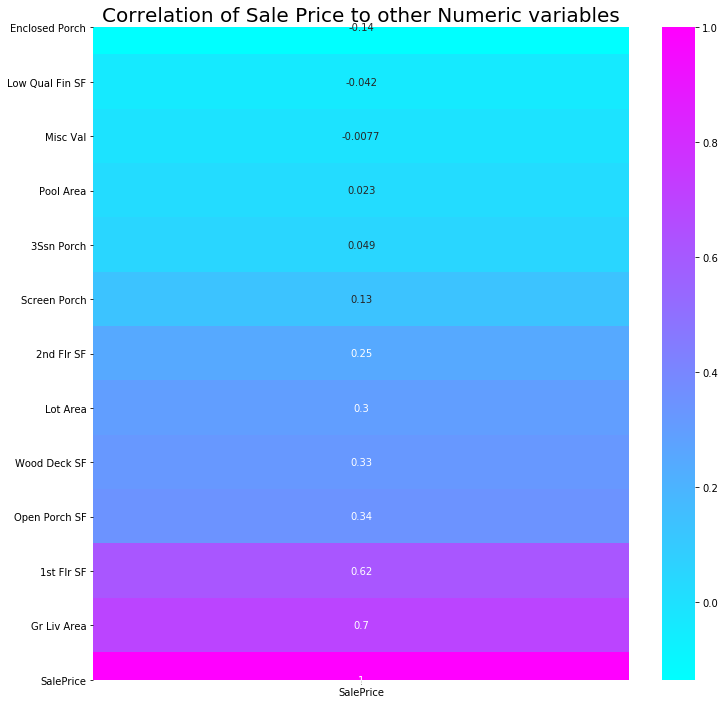

In [13]:
# Time to do a correlation heatmap!

plt.figure(figsize = (12, 12))
plt.title('Correlation of Sale Price to other Numeric variables', fontsize=20)
sns.heatmap(df_basic.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap='cool')

So we can see that several items have very low correlations, despite having high significance. We can test these using a cross val score later.

We can probably go ahead and submit our first Kaggle CSV using just this data for the model. 

### EDA findings: 

Most of the null values are categorical that are associated with other features, eg Bsmt Qual is probably only populated when a house actually has a basement. This will be further confirmed as we dig more into feature selection.

Fortunately, it looks like most of the columns that are missing values are categorical in nature. This means that if we choose to use them as dummys, the NaNs will be ignored. We'll dig a little deeper on some of the others like Lot Frontage later. It may be the case that lot frontage is a NaN for categories like appartments and condos, in which case we can impute a proxy like the mean for all of those since the difference can be accounted for in another variable. Another option is imputing them with 0's and using an engineered feature like Lot Frontage * SubClassDummy.

## 4. Initial Modeling

We'll start with a model that only incorporates the numerical features that we have selected above and submit to Kaggle to see how we do relative to the rest of the cohorts. Because this data set has so many features, we'll do our subsequent EDA a little more piecemeal as we refine the model.

In [14]:
# we need to get everything into the right format for Kaggle, 
# which is a csv that only has the ID and predicted values

kaggle_test = pd.read_csv('./datasets/test.csv')
kaggle_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [15]:
submission = kaggle_test[['Id']].copy()
submission.head()

,Id
0,2658
1,2718
2,2414
3,1989
4,625


In [16]:
test_features = df_basic.drop(columns='SalePrice').columns
X_kag_test = kaggle_test[test_features]
X_kag_test.head()
X_train = df_basic[test_features]
y_train = df_basic['SalePrice']

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
submission['SalePrice'] = lr.predict(X_kag_test)
submission.head()

,Id,SalePrice
0,2658,181961.005726
1,2718,270534.396683
2,2414,151767.094678
3,1989,98925.883036
4,625,201856.822748


In [19]:
submission.to_csv('./submissions/submission_0.csv', index=False)

## 5. Model Refinement

### Automation

Lets start by automating some of the more repetive code that may come up. 

In [20]:
def fit_linear_reg(X, y):
    '''Fit a linear regression model to an already defined X and y
    
    Keyword Arguments:
    X -- the feature matrix 
    y -- the target values of the feature matrix
    
    Returns:
    model -- a linear regression model fit to X and y
    predicts -- the predictions of y based on X
    resids -- the y residuals'''
     
    model = LinearRegression()
    model.fit(X, y)
    predicts = model.predict(X)
    resids = y - predicts
    
    return model, predicts, resids

In [22]:
# Let's plot resids as a function as well:

def plot_resids(y, predictions, residuals, title):
    """Plots residuals vs Observations. Requires Seaborn as sns
    
    Keyword arguments:
    y - the dependent variable training data/observed data
    predictions -- The output of a model
    residuals -- The matched residuals of the above output
    
    Returns:
    Two scatterplots: predictions vs actual values and residual vs actual values
    """
    
    fig, (ax1, ax2) = plt.subplots(figsize = (14, 6), ncols=2)
    plt.subplots_adjust(wspace = 0.25)
    fig.suptitle(title, fontsize=18)
    
    sns.scatterplot(predictions, y, ax=ax1)
    ax1.set_title("Predictions vs. Actual")
    ax1.set_ylabel("Actual")
    ax1.set_xlabel("Predicted")

    sns.scatterplot(y, residuals, ax=ax2)
    ax2.set_title('Residuals vs Observations')
    ax2.set_ylabel("Residual")
    ax2.set_xlabel("Observation")
    


In [23]:
# How about doing this for metrics too?

def print_lr_metrics(lr, X, y):
    """Prints MAE, MSE, SSE, RSE, R2, R2_adj, and K-fold cross val score for k=5
    
    Keyword Arguments:
    lr -- the model used to generate the predictions
    X -- independent matrix used to generate the predictions
    y -- the observed dependent variable associated with X
    predictions -- the predictions associated with X
    
            
    Returns:
    printed output of the previously mentioned metrics
    """
    predictions = lr.predict(X)
    residuals = y - predictions
    sum_sq_err = (residuals ** 2).sum()
    mae = metrics.mean_absolute_error(y, predictions)
    mse = metrics.mean_squared_error(y, predictions)
    r_2 = lr.score(X, y)
    n, k = X.shape
    r2_adj = 1 - (((1 - r_2) * (n-1)) / (n-k-1))
    cv_score = cross_val_score(lr, X, y, cv=5).mean()
    print('The mean of residuals is: ', residuals.mean())
    print('The Mean Absolute Error: ', mae)
    print('The Sum Squared Error: ', sum_sq_err)
    print('The Mean Squared Error: ', mse)
    print('The Root Mean Squared Error: ', np.sqrt(mse))
    print('The Coefficient of Determination: ', r_2)
    print('The Adjusted Coefficient of Determination: ', r2_adj)
    print('The 5-fold cross validation score: ', cv_score)


In [24]:
def model_score_compare(model, X_train, y_train, X_test, y_test):
    '''Compare the scores of training data and testing data
    
    Keyword Arguments:
    model -- the fitted model
    X_train -- X training matrix
    y_train -- y training series
    X_test -- X testing matrix
    y_test -- y testing series
    
    Returns:
    train_score -- the model training score
    test_score -- the model testing score'''
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score

In [25]:
# finally, lets make a function that automatically creates 
# a Kaggle submission CSV

# instantiate a counter

kag_counter = 1

def create_kaggle_csv(model, X_test_data, counter, test_data=kaggle_test, y_index=['Id'], y_name='SalePrice', log=True ):
    """Creates a Kaggle file for submission with suffix kag_counter
    
    Keyword Arguments:
    model -- the fitted model that will be used to make predictions
    X_test_data -- the dataframe for the test dataset used to make predicitons
    test_data -- the data frame from which the test data was taken
    y_index -- the column of the test data used to index the predictions
    y_name -- the column name in the target CSV for the predictions 
                    NOTE: X_test_data **MUST** be in the same format as the model!!
                    Make sure that any transforms and/or scaling is done first!!
                    
    Returns:
    A CSV file with the index and predicted values
    A statement that lets you know the ordinal of this submission"""
    
    output_name = "submission_" + str(counter) +'.csv'
    submission = test_data[y_index].copy()
    submission[y_name] = model.predict(X_test_data)
    if log == True:
        submission[y_name] = np.exp(submission[y_name])
    submission.to_csv('./submissions/' + output_name, index=False)
    print("This is submission number: ", counter)
    counter += 1
    return counter

### Basic Feature Generation

Our dependent feature is 'SalePrice', although given the distribution, it may be more beneficial to use the ln of this feature.

Now that we're getting into more robust modelling, we need to split the data into training and testing sets. Then we'll start refining the model by doing a polynomial expansion of our numerical features, then determining which of them are important via regularization with Lasso.

In [26]:
# now that we have some functions built, let's play around with some features!
y_targ = 'SalePrice'

# going back to the original dataframe, there are a few columns I want to dummy.
# before we get that far though, we should train/test/split our data and
# try a poly fit for our numeric data. 

X_targ = df_basic.drop(columns=[y_targ])
y = df_basic[y_targ]

X_train, X_test, y_train, y_test = train_test_split(X_targ, y, test_size = 0.2, random_state = 42)

In [27]:
poly = PolynomialFeatures()

X_train_pf = poly.fit_transform(X_train)
X_test_pf = poly.transform(X_test)

X_train_pf = pd.DataFrame(X_train_pf, columns=poly.get_feature_names(X_targ.columns))
X_test_pf = pd.DataFrame(X_test_pf, columns=poly.get_feature_names(X_targ.columns))

In [28]:
lr_poly, poly_preds, poly_resids = fit_linear_reg(X_train_pf, y_train)

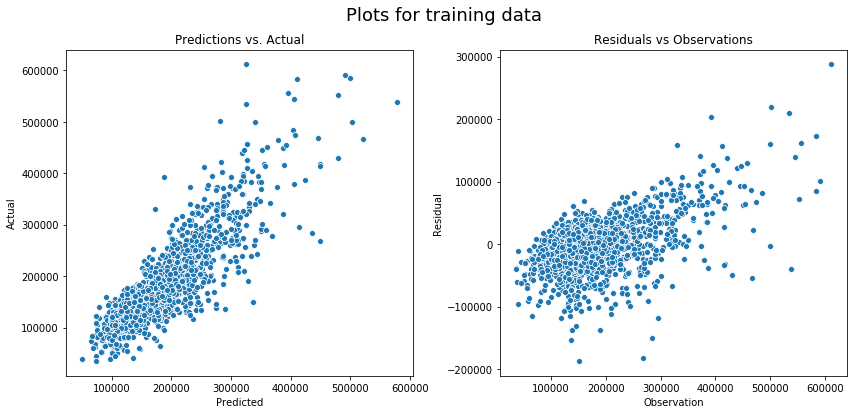

In [29]:
plot_resids(y_train, poly_preds, poly_resids, "Plots for training data")

In [30]:
# we definitely have a kind of shotgun spread to the residuals. 
# a log conversion might be in order here.

print_lr_metrics(lr_poly, X_train_pf, y_train)

The mean of residuals is:  -1.2561909727051727e-11
The Mean Absolute Error:  28824.253129794994
The Sum Squared Error:  2705363434761.1367
The Mean Squared Error:  1651626028.5477026
The Root Mean Squared Error:  40640.202122377574
The Coefficient of Determination:  0.7409630359500815
The Adjusted Coefficient of Determination:  0.7257157114167422
The 5-fold cross validation score:  -0.9641291662136682


In [31]:
# thats a very odd cross val score, so lets confirm
cross_val_score(lr_poly, X_train_pf, y_train, cv=5)

array([ 0.68043222, -7.34158861,  0.54404361,  0.63462719,  0.66183976])

In [32]:
# I suspect we have an outlier. . . 

In [33]:
model_score_compare(lr_poly, X_train_pf, y_train, X_test_pf, y_test)

(0.7409630359500815, 0.5055144084999466)

In [34]:
# in it's current state, the model seems to be pretty overfit to the data
# lets try the log conversion first to see how that affects residuals:

y_train_ln = np.log(y_train)
y_test_ln = np.log(y_test)

lr_poly_ln, poly_preds_ln, resids_poly_ln = fit_linear_reg(X_train_pf, y_train_ln)

In [35]:
model_score_compare(lr_poly_ln, X_train_pf, y_train_ln, X_test_pf, y_test_ln)

(0.7291444451571548, 0.20446448850518673)

In [36]:
print_lr_metrics(lr_poly_ln, X_train_pf, y_train_ln)

The mean of residuals is:  2.1277241263145857e-15
The Mean Absolute Error:  0.15868783838688585
The Sum Squared Error:  72.76496381262547
The Mean Squared Error:  0.04442305483066268
The Root Mean Squared Error:  0.21076777464940574
The Coefficient of Determination:  0.7291444451571548
The Adjusted Coefficient of Determination:  0.713201459716858
The 5-fold cross validation score:  -1.195053855876568


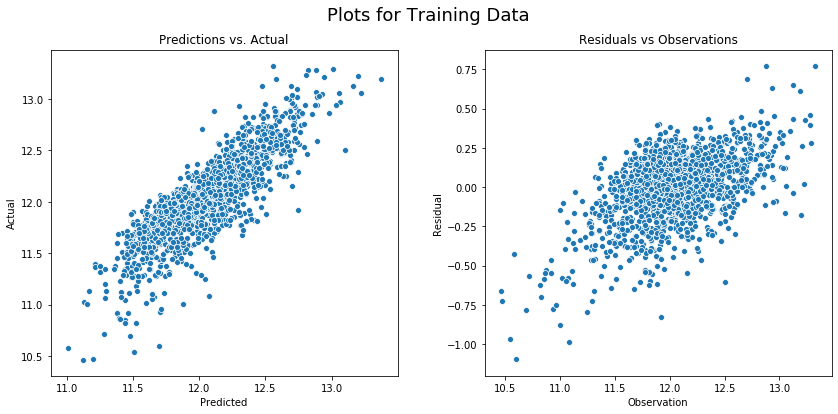

In [37]:
plot_resids(y_train_ln, poly_preds_ln, resids_poly_ln, "Plots for Training Data")

In [38]:
# Let's scale everything then use a LassoCV to narrow down some of these variables!

ss = StandardScaler()
Z_train = ss.fit_transform(X_train_pf)
Z_test = ss.transform(X_test_pf);

In [39]:
# since we have no idea whatsoever what the alpha should be, lets just iterate through a big 
# space. 

lasso_alphas = np.logspace(-4, 0, 1_000)
lasso = LassoCV(alphas=lasso_alphas, cv=5, max_iter=5_000)

lasso.fit(Z_train, y_train_ln);

In [40]:
lasso.score(Z_train, y_train_ln)

0.7096567354031229

In [41]:
lasso.score(Z_test, y_test_ln)

0.33660126548308034

In [42]:
lasso.alpha_

0.003292437333007769

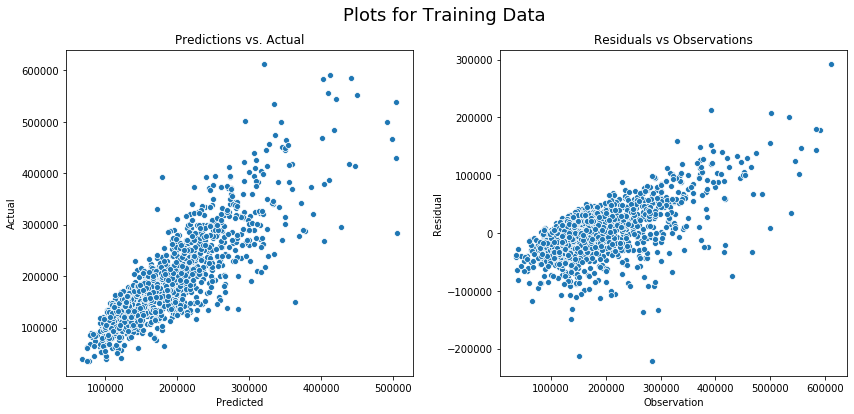

In [43]:
# definitely a major improvement! We've only sacrificed a small amount of 
# bias for a pretty big leap in the improvement of the variance
# lets take a look at the plots

preds = np.exp(lasso.predict(Z_train))
resids = np.exp(y_train_ln) - preds
plot_resids(y_train, preds, resids, 'Plots for Training Data')

Now that we have a better aggreement between our training set and testing set, lets go ahead and predict values for the test.csv and submit to Kaggle to see how we're doing! First, we need to do the same polynomial transform on the Kaggle test set:

In [44]:
# first, let's make sure that our kaggle test data has the same number of columns as our train data.
X_train.shape

(1638, 12)

In [45]:
X_kag_test.shape

(878, 12)

In [46]:
# now we can poly transform the kaggle test data 
X_kag_test_pf = poly.transform(X_kag_test)
X_kag_test_pf.shape

(878, 91)

In [47]:
Z_train.shape

(1638, 91)

In [48]:
# now we need to scale the kaggle test data:
Z_test_kag = ss.transform(X_kag_test_pf)

In [49]:
# now we can generate our predictions and CSV:
kag_counter = 1
kag_counter = create_kaggle_csv(lasso, Z_test_kag, kag_counter)

This is submission number:  1


In [50]:
kag_counter

2

In [53]:
# This submission was a definite improvement over the previous!
# Now let's take a look at the variables that the model discarded and only keep those for future modeling:

lasso_betas = pd.Series(index = poly.get_feature_names(X_train.columns), data = lasso.coef_)
lasso_betas[lasso_betas != 0]

Lot Area                         0.025767
1st Flr SF                       0.166974
Low Qual Fin SF                 -0.013465
Gr Liv Area                      0.276556
Wood Deck SF                     0.083391
Open Porch SF                    0.107005
Enclosed Porch                  -0.031585
Lot Area 1st Flr SF             -0.033460
Lot Area Low Qual Fin SF        -0.009462
Lot Area Wood Deck SF            0.009100
Lot Area Enclosed Porch         -0.002888
Lot Area Screen Porch            0.001237
Lot Area Pool Area              -0.046809
1st Flr SF 2nd Flr SF           -0.019652
1st Flr SF Gr Liv Area          -0.117265
1st Flr SF Wood Deck SF          0.026710
1st Flr SF Enclosed Porch       -0.000664
1st Flr SF Screen Porch          0.026725
2nd Flr SF^2                     0.006555
2nd Flr SF Low Qual Fin SF      -0.011511
2nd Flr SF Wood Deck SF         -0.016192
2nd Flr SF Screen Porch         -0.000837
Low Qual Fin SF Open Porch SF   -0.017175
Low Qual Fin SF Screen Porch    -0

In [55]:
poly_feature_list = list(lasso_betas[lasso_betas > 0].index)
poly_feature_list

['Lot Area',
 '1st Flr SF',
 'Gr Liv Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Lot Area Wood Deck SF',
 'Lot Area Screen Porch',
 '1st Flr SF Wood Deck SF',
 '1st Flr SF Screen Porch',
 '2nd Flr SF^2',
 'Gr Liv Area 3Ssn Porch',
 'Open Porch SF Enclosed Porch',
 'Open Porch SF 3Ssn Porch',
 'Enclosed Porch Screen Porch',
 'Pool Area^2']

In [56]:
# Now we have some features narrowed down. Time to add some dummies!

### Feature Generation Continued

15 features of the polynomial model have been retained for future model development.

The next step will be to explore dummy features that contribute to the model. 

Features to be dummied then tested:

1. Features that are ordinal
2. Features that are discrete
3. Features that are nominal


If none of these improve the model much, then we can move on to other features.

#### Ordinal Features:

Lets make a list of the features that are ordinal:

In [59]:
# we'll start with Sale Type.
# first we need to do the poly transform

df_poly = df_basic.drop(columns=['SalePrice'])
df_poly = poly.transform(df_poly)
df_poly = pd.DataFrame(df_poly, columns=(poly.get_feature_names(X_train.columns)))
df_poly.head()

,1,Lot Area,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Lot Area^2,Lot Area 1st Flr SF,Lot Area 2nd Flr SF,Lot Area Low Qual Fin SF,Lot Area Gr Liv Area,Lot Area Wood Deck SF,Lot Area Open Porch SF,Lot Area Enclosed Porch,Lot Area 3Ssn Porch,Lot Area Screen Porch,Lot Area Pool Area,Lot Area Misc Val,1st Flr SF^2,1st Flr SF 2nd Flr SF,1st Flr SF Low Qual Fin SF,1st Flr SF Gr Liv Area,1st Flr SF Wood Deck SF,1st Flr SF Open Porch SF,1st Flr SF Enclosed Porch,1st Flr SF 3Ssn Porch,1st Flr SF Screen Porch,1st Flr SF Pool Area,1st Flr SF Misc Val,2nd Flr SF^2,2nd Flr SF Low Qual Fin SF,2nd Flr SF Gr Liv Area,2nd Flr SF Wood Deck SF,2nd Flr SF Open Porch SF,2nd Flr SF Enclosed Porch,2nd Flr SF 3Ssn Porch,2nd Flr SF Screen Porch,2nd Flr SF Pool Area,2nd Flr SF Misc Val,Low Qual Fin SF^2,Low Qual Fin SF Gr Liv Area,Low Qual Fin SF Wood Deck SF,Low Qual Fin SF Open Porch SF,Low Qual Fin SF Enclosed Porch,Low Qual Fin SF 3Ssn Porch,Low Qual Fin SF Screen Porch,Low Qual Fin SF Pool Area,Low Qual Fin SF Misc Val,Gr Liv Area^2,Gr Liv Area Wood Deck SF,Gr Liv Area Open Porch SF,Gr Liv Area Enclosed Porch,Gr Liv Area 3Ssn Porch,Gr Liv Area Screen Porch,Gr Liv Area Pool Area,Gr Liv Area Misc Val,Wood Deck SF^2,Wood Deck SF Open Porch SF,Wood Deck SF Enclosed Porch,Wood Deck SF 3Ssn Porch,Wood Deck SF Screen Porch,Wood Deck SF Pool Area,Wood Deck SF Misc Val,Open Porch SF^2,Open Porch SF Enclosed Porch,Open Porch SF 3Ssn Porch,Open Porch SF Screen Porch,Open Porch SF Pool Area,Open Porch SF Misc Val,Enclosed Porch^2,Enclosed Porch 3Ssn Porch,Enclosed Porch Screen Porch,Enclosed Porch Pool Area,Enclosed Porch Misc Val,3Ssn Porch^2,3Ssn Porch Screen Porch,3Ssn Porch Pool Area,3Ssn Porch Misc Val,Screen Porch^2,Screen Porch Pool Area,Screen Porch Misc Val,Pool Area^2,Pool Area Misc Val,Misc Val^2
0,1.0,13517.0,725.0,754.0,0.0,1479.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,182709289.0,9799825.0,10191818.0,0.0,19991643.0,0.0,594748.0,0.0,0.0,0.0,0.0,0.0,525625.0,546650.0,0.0,1072275.0,0.0,31900.0,0.0,0.0,0.0,0.0,0.0,568516.0,0.0,1115166.0,0.0,33176.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2187441.0,0.0,65076.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,11492.0,913.0,1209.0,0.0,2122.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,132066064.0,10492196.0,13893828.0,0.0,24386024.0,0.0,850408.0,0.0,0.0,0.0,0.0,0.0,833569.0,1103817.0,0.0,1937386.0,0.0,67562.0,0.0,0.0,0.0,0.0,0.0,1461681.0,0.0,2565498.0,0.0,89466.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4502884.0,0.0,157028.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5476.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,7922.0,1057.0,0.0,0.0,1057.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,62758084.0,8373554.0,0.0,0.0,8373554.0,0.0,411944.0,0.0,0.0,0.0,0.0,0.0,1117249.0,0.0,0.0,1117249.0,0.0,54964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1117249.0,0.0,54964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,9802.0,744.0,700.0,0.0,1444.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,96079204.0,7292688.0,6861400.0,0.0,14154088.0,980200.0,0.0,0.0,0.0,0.0,0.0,0.0,553536.0,520800.0,0.0,1074336.0,74400.0,0.0,0.0,0.0,0.0,0.0,0.0,490000.0,0.0,1010800.0,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2085136.0,144400.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,14235.0,831.0,614.0,0.0,1445.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,202635225.0,11829285.0,8740290.0,0.0,20569575.0,0.0,839865.0,0.0,0.0,0.0,0.0,0.0,690561.0,510234.0,0.0,1200795.0,0.0,49029.0,0.0,0.0,0.0,0.0,0.0,376996.0,0.0,887230.0,0.0,36226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [60]:
# now we create a dataframe with just the features we saved

df_refined = df_poly[poly_feature_list]
df_refined.shape

(2048, 15)

In [63]:
# while we're at it, lets do the same for the Kaggle test data:

df_kag_poly = poly.transform(X_kag_test)
df_kag_poly = pd.DataFrame(df_kag_poly, columns=(poly.get_feature_names(X_train.columns)))
df_kag_ref = df_kag_poly[poly_feature_list]
df_kag_ref.shape

(878, 15)

In [64]:
# now lets get the dummies. we'll concatenate the kaggle test set, then seperate
# so that we can make sure there are the same number of dummy columns. Code inspired by:
# https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data

# first, we need to concatenate the kaggle test data to the original dataframe:
data_df = df.drop(columns='SalePrice')
data_all = pd.concat([data_df, kaggle_test], axis=0)
data_all.index = list(range(len(data_all)))
data_all.shape

(2926, 80)

In [65]:
# now we get the number of items in our test set with refined features:
df_ref_rows = len(df_refined)

In [66]:
# now we can concatenate the refined training data to the refined kaggle test data:
data_ref = pd.concat([df_refined, df_kag_ref], axis=0)
data_ref.index = list(range(len(data_ref)))
data_ref.shape

(2926, 15)

In [67]:
# get the dummies from the training/kaggle dataset made above:
data_dummy = pd.get_dummies(data_all['Sale Type'], drop_first=True)
data_dummy.shape

(2926, 9)

In [68]:
# concat the data and the dummies:
data_w_dum = pd.concat([data_ref, data_dummy], axis=1, ignore_index=True)

In [69]:
# now seperate back into seperate training and kaggle test sets:
df_ref = data_w_dum[:df_ref_rows]
df_kag = data_w_dum[df_ref_rows:]

In [70]:
# now we can train/test/split

X = df_ref
y = np.log(df['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# lets start with a regular linear regression model:

lr_st, st_preds, st_resids = fit_linear_reg(X_train, y_train)

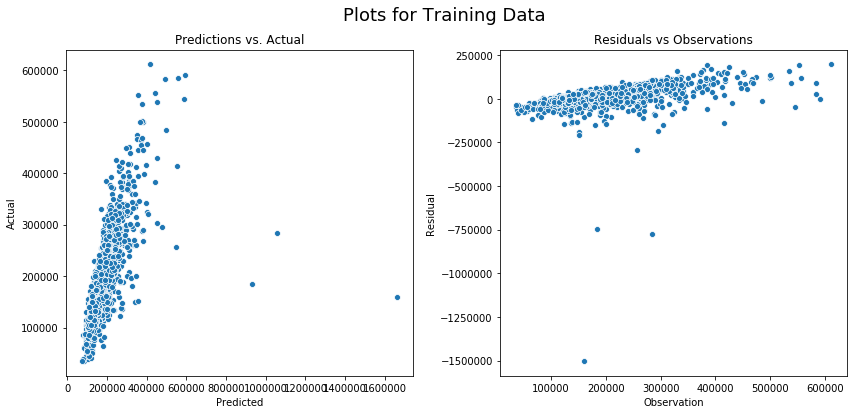

In [72]:
# now lets see how it does:

y_train_exp = np.exp(y_train)
st_preds_exp = np.exp(st_preds)
st_resids_exp = y_train_exp - st_preds_exp

plot_resids(y_train_exp, st_preds_exp, st_resids_exp, "Plots for Training Data")

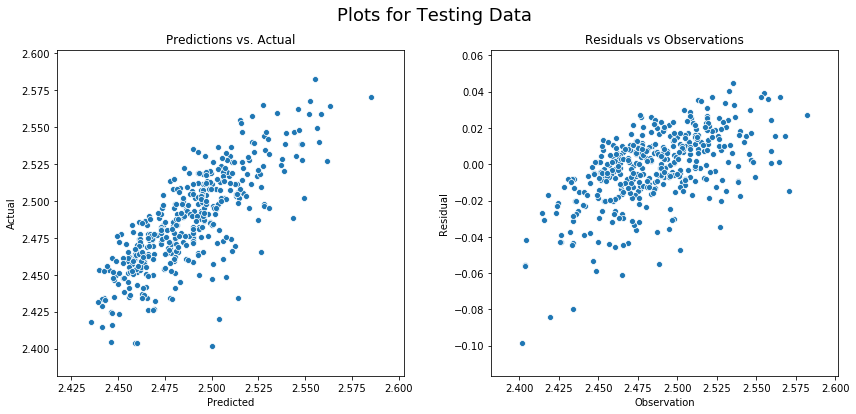

In [73]:
y_test_preds = lr_st.predict(X_test)
y_test_exp = np.log(y_test)
y_test_preds_exp = np.log(y_test_preds)
test_resids = y_test_exp - y_test_preds_exp
plot_resids(y_test_exp, y_test_preds_exp, test_resids, "Plots for Testing Data")

In [74]:
print_lr_metrics(lr_st, X_train, y_train)

The mean of residuals is:  1.7167111579796071e-15
The Mean Absolute Error:  0.1774233135700778
The Sum Squared Error:  96.17435959412032
The Mean Squared Error:  0.058714505246715704
The Root Mean Squared Error:  0.24231076172286634
The Coefficient of Determination:  0.6420068372932946
The Adjusted Coefficient of Determination:  0.6366802186293385
The 5-fold cross validation score:  0.6151358853416345


In [75]:
model_score_compare(lr_st, X_train, y_train, X_test, y_test)

(0.6420068372932946, 0.6206857756127965)

The mean of residuals is:  1.3924555444382916e-15
The Mean Absolute Error:  0.18847169993354498
The Sum Squared Error:  105.70682155094849
The Mean Squared Error:  0.06453407909093314
The Root Mean Squared Error:  0.2540355862688004
The Coefficient of Determination:  0.6065238227069941
The Adjusted Coefficient of Determination:  0.6026400356393272
The 5-fold cross validation score:  0.5813163204474121
(0.6065238227069941, 0.5915662514825026)


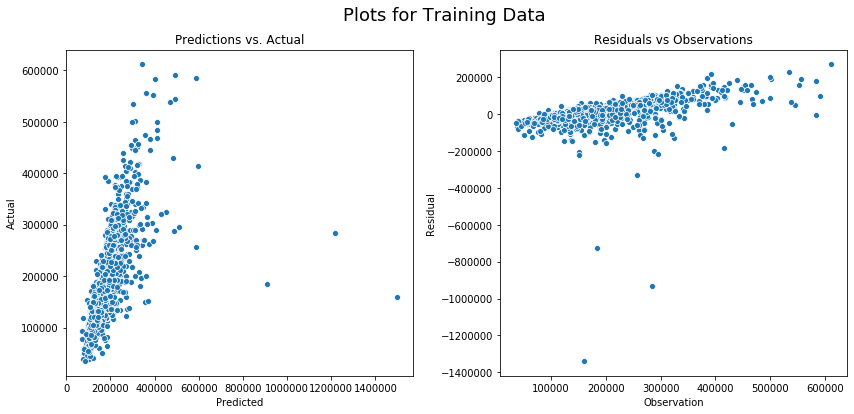

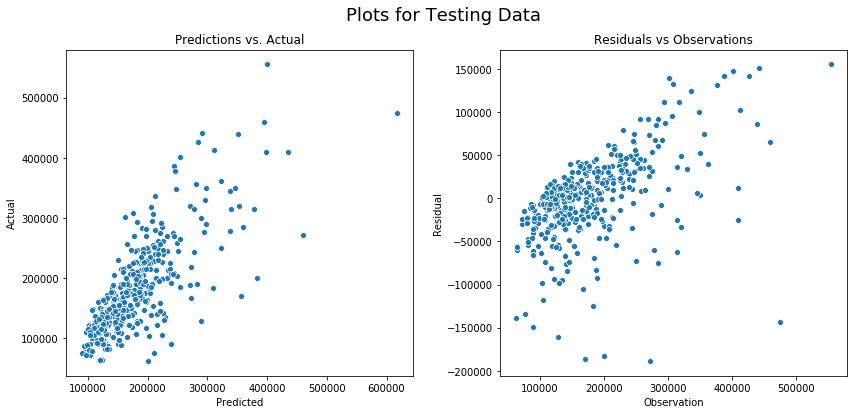

In [79]:
# sale type didn't really seem to do much, but we'll be running these exact lines of 
# code for a while, so lets make a function to automate it

def add_dummies_and_fit(dummy, data_ref, data=data_all, rows=df_ref_rows):
    '''This function will automatically add a dummy column, evaluate it, plot the predictions 
    and residuals, then return the refined dataset with dummies and the kaggle test data with dummies
    
    Keyword Arguments: 
    dummy -- the name of the column for which we want to create dummies
    data_ref -- the X dataset that contains training data + kaggle data as well as the features 
                we have decided to keep
    data -- the full dataset, defaulted to data_all
    rows -- the number of rows of training data 
            (where we will divide the training data from the kaggle test data)
            
    Returns: 
    model -- the fitted Linear Regression
    data_w_dum -- the refined dataset with the new dummies
    df_kag -- the kaggle test dataset with the new dummies'''
    
    data_dummies = pd.get_dummies(data_all[dummy], prefix=str(dummy), drop_first=True)
    data_w_dum = pd.concat([data_ref, data_dummies], axis=1)
    df_ref = data_w_dum[:df_ref_rows]
    df_kag = data_w_dum[df_ref_rows:]
    
    X = df_ref
    y = np.log(df['SalePrice'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lr, preds, resids = fit_linear_reg(X_train, y_train)
    
    print_lr_metrics(lr, X_train, y_train)
    
    print(model_score_compare(lr, X_train, y_train, X_test, y_test))
    
    y_train_exp = np.exp(y_train)
    preds_exp = np.exp(preds)
    resids_exp = y_train_exp - preds_exp
    
    plot_resids(y_train_exp, preds_exp, resids_exp, "Plots for Training Data")
    
    y_test_preds = lr.predict(X_test)
    y_test_exp = np.exp(y_test)
    y_test_preds_exp = np.exp(y_test_preds)
    test_resids = y_test_exp - y_test_preds_exp
    
    plot_resids(y_test_exp, y_test_preds_exp, test_resids, "Plots for Testing Data")
    
    return lr, data_dummies, df_kag

lr, data_w_dum, df_kag = add_dummies_and_fit(['Street'], data_ref)

In [80]:
data_w_dum.head()

,['Street']_Pave
0,1
1,1
2,1
3,1
4,1


In [81]:
# so that is a pretty significant improvement, both for bias and variance
# lets re-write our refined data to match the data_w_dum, since we 
# want to keep these variables

data_ref = data_w_dum
data_ref.shape

(2926, 1)

The mean of residuals is:  6.138082851651659e-16
The Mean Absolute Error:  0.17184844370218538
The Sum Squared Error:  84.179146926598
The Mean Squared Error:  0.051391420590108663
The Root Mean Squared Error:  0.22669675910808398
The Coefficient of Determination:  0.6866570344800339
The Adjusted Coefficient of Determination:  0.6847311404079996
The 5-fold cross validation score:  0.6766224822412099
(0.6866570344800339, 0.6919272739802643)


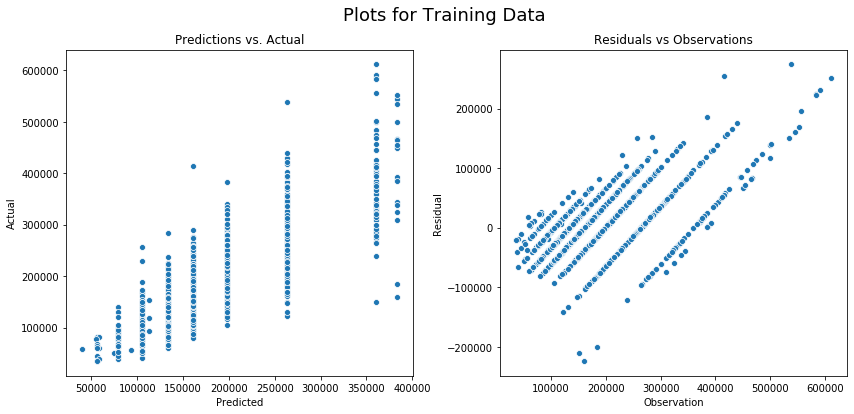

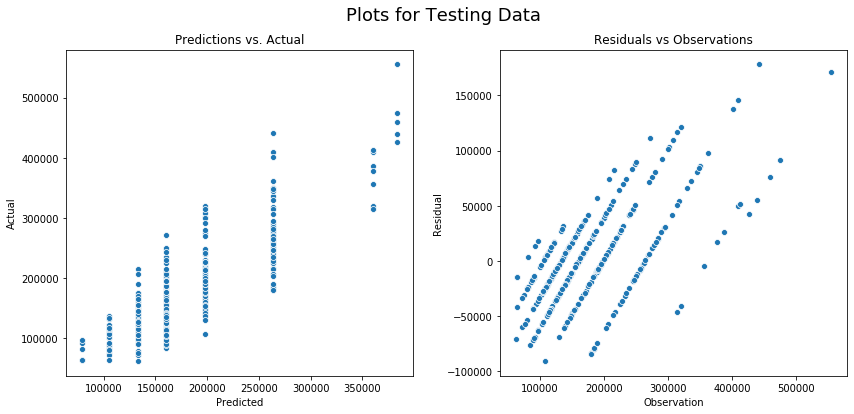

In [82]:
# not going to submit to kaggle just yet, though
# now lets add in the Overall Qual as dummies

lr, data_w_dum, df_kag = add_dummies_and_fit('Overall Qual', data_ref)

In [83]:
# wow, big advances in both bias and variance with that one!
# let's save those variables and submit that to Kaggle!

data_ref = data_w_dum

kag_counter = create_kaggle_csv(lr, df_kag, kag_counter)

This is submission number:  2


The mean of residuals is:  1.8641986611288344e-15
The Mean Absolute Error:  0.14401009702631246
The Sum Squared Error:  60.8491358804021
The Mean Squared Error:  0.037148434603420086
The Root Mean Squared Error:  0.19273929179962265
The Coefficient of Determination:  0.7734991457834779
The Adjusted Coefficient of Determination:  0.7684060597423819
The 5-fold cross validation score:  0.7588245827141552
(0.7734991457834779, 0.755385113958097)


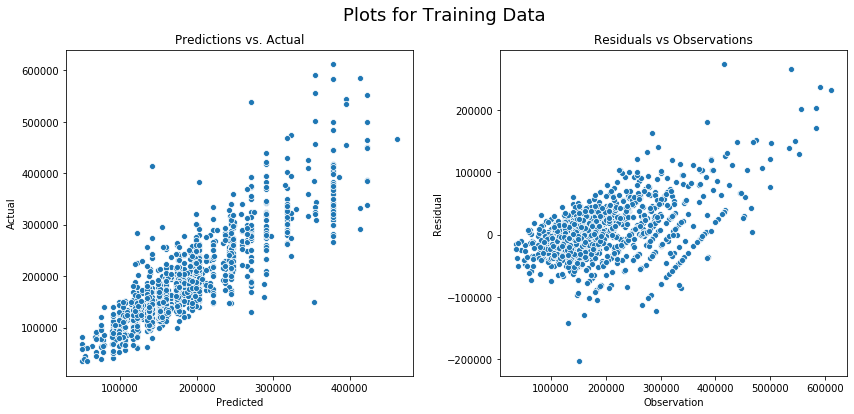

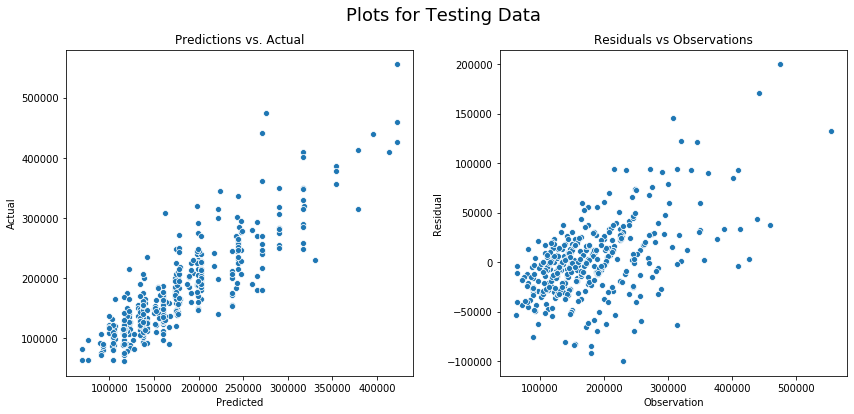

In [84]:
# now lets add the neighborhood

lr, data_w_dum, df_kag = add_dummies_and_fit('Neighborhood', data_ref)

In [85]:
# so, starting to show some bias/variance tradeoff here. Still worth submitting!
data_ref = data_w_dum
kag_counter = create_kaggle_csv(lr, df_kag, kag_counter)

This is submission number:  3


The mean of residuals is:  1.3892021436335292e-15
The Mean Absolute Error:  0.18749337111903777
The Sum Squared Error:  105.63719150450953
The Mean Squared Error:  0.06449156990507297
The Root Mean Squared Error:  0.2539519047084959
The Coefficient of Determination:  0.6067830090498957
The Adjusted Coefficient of Determination:  0.5986931333009222
The 5-fold cross validation score:  -3.074483562148142e+22
(0.6067830090498957, 0.5582553562524013)


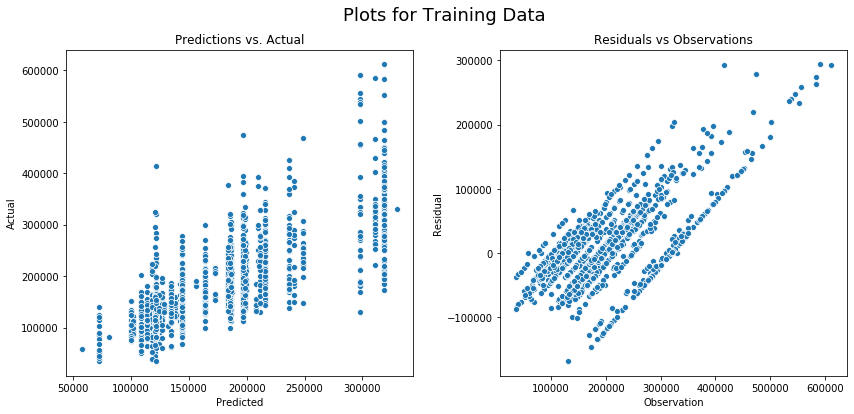

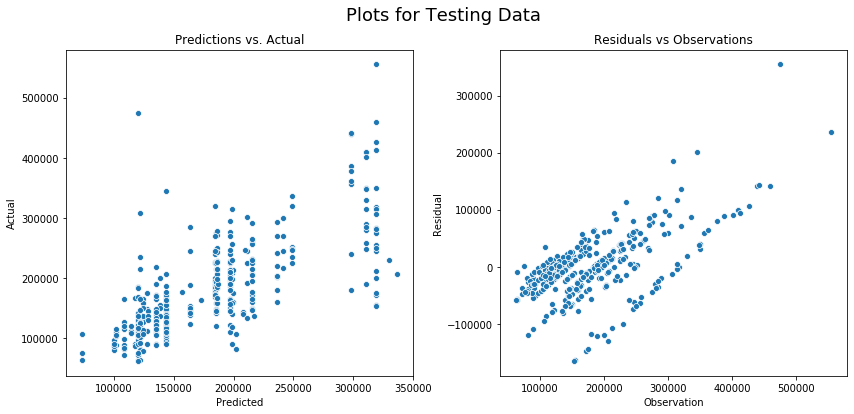

In [86]:
# I think the next item to try is probably zoning:

lr, data_w_dum, df_kag = add_dummies_and_fit('MS Zoning', data_ref)

The mean of residuals is:  1.196167029217629e-15
The Mean Absolute Error:  0.17423370955515446
The Sum Squared Error:  91.34641887642701
The Mean Squared Error:  0.05576704449110318
The Root Mean Squared Error:  0.2361504700209237
The Coefficient of Determination:  0.6599780488946159
The Adjusted Coefficient of Determination:  0.6510244928153518
The 5-fold cross validation score:  0.637827742585386
(0.6599780488946159, 0.6292064847911977)


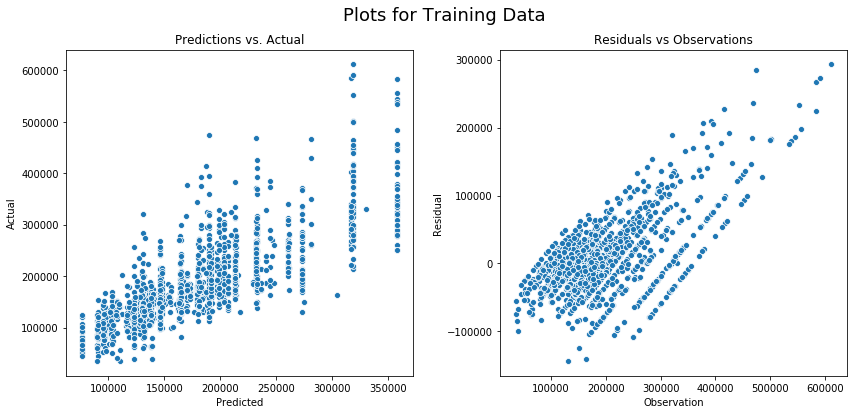

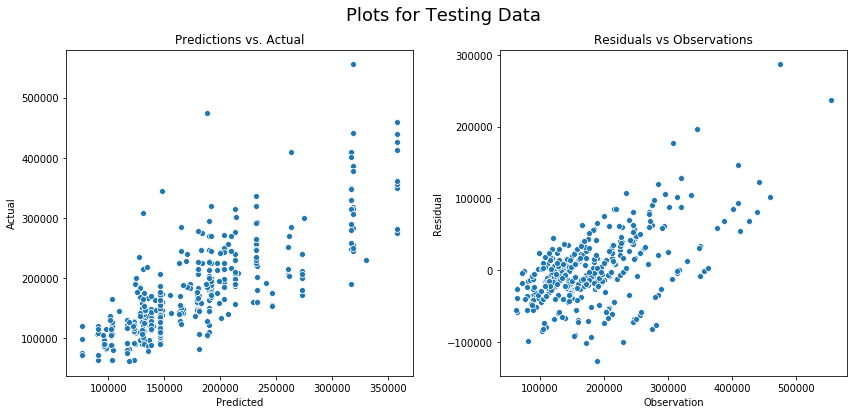

In [87]:
# this one only incrementally increased bias, with a corresponding increase in variance
# Probably not worth keeping

# in our orignal list, we've now tested everything except subclass. Let's try that, 
# then see if we want to find some other items to look at

lr, data_w_dum, df_kag = add_dummies_and_fit('MS SubClass', data_ref)

In [88]:
# subclass didn't really improve our bias, but definitely improved our variance
# lets keep it and submit

data_ref = data_w_dum
kag_counter = create_kaggle_csv(lr, df_kag, kag_counter)

This is submission number:  4


### Feature Generation part 3

We've got a pretty good looking model now, but I think it can be better!

There are plenty of other features worth exploring:

1. Bldg Type is the low hanging fruit from what is left
2. Condition is actually a pair of columns. We can simplify that a little by adding them together before we dummy
3. Exterior is similar to Condition
4. House Style might be worth exploring
5. exterior quality 
5. exterior condition - because we often judge things on how they look
6. Foundation 
7. Roof Style
8. Roof Matl
9. Year Built
10. Year Remod/Add
11. lot config


The mean of residuals is:  0.00021598109951545633
The Mean Absolute Error:  0.24992764289925634
The Sum Squared Error:  177.00506497031506
The Mean Squared Error:  0.10806170022607757
The Root Mean Squared Error:  0.32872739500394177
The Coefficient of Determination:  0.34112789218195183
The Adjusted Coefficient of Determination:  0.333390827875065
The 5-fold cross validation score:  -13710785411014.082
(0.34112789218195183, 0.34331418925518975)


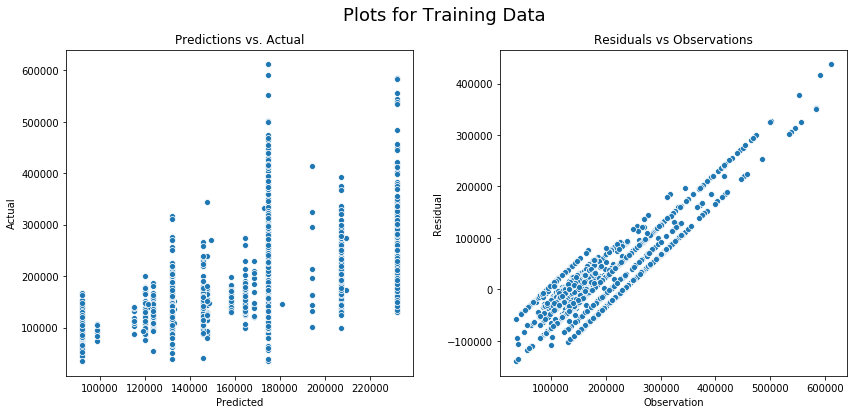

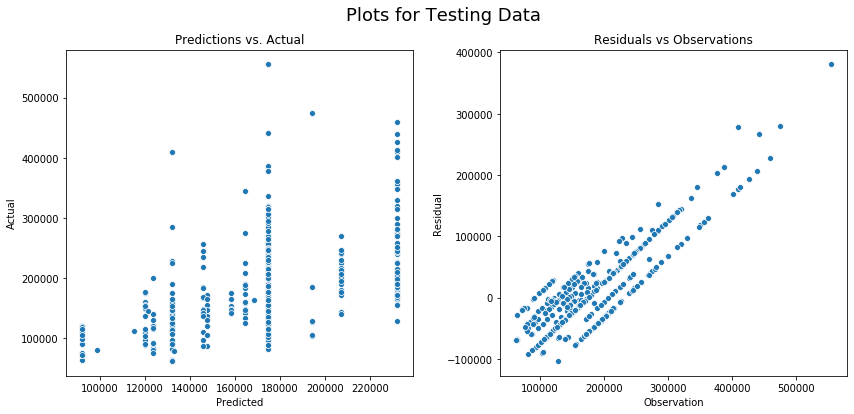

In [89]:
# Lets start with bldg type:

lr, data_w_dum, df_kag = add_dummies_and_fit('Bldg Type', data_ref)

In [90]:
# so this is a very incremental improvement, so we'll keep it, but not submit as yet

data_ref = data_w_dum

The mean of residuals is:  5.530781368096018e-16
The Mean Absolute Error:  0.2440519591159741
The Sum Squared Error:  175.2793864474596
The Mean Squared Error:  0.10700817243434652
The Root Mean Squared Error:  0.32712103636780454
The Coefficient of Determination:  0.3475514453495451
The Adjusted Coefficient of Determination:  0.34394454302039634
The 5-fold cross validation score:  0.33572781832429077
(0.3475514453495451, 0.36834855881463124)


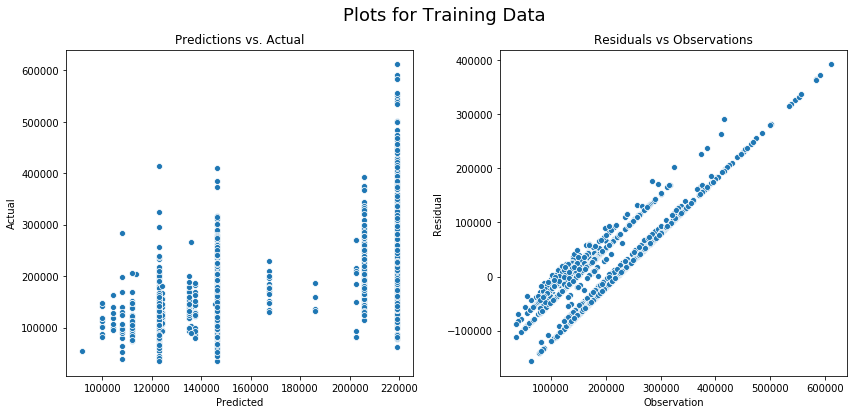

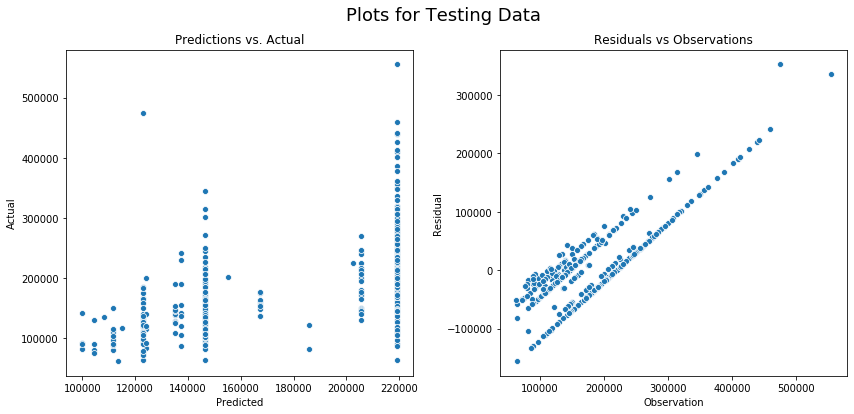

In [91]:
# I'm going to try foundation next:
lr, data_w_dum, df_kag = add_dummies_and_fit('Foundation', data_ref)

In [92]:
# another incremental improvement. Let's save it and keep going

data_ref = data_w_dum

The mean of residuals is:  1.0107231833461742e-15
The Mean Absolute Error:  0.244445856796966
The Sum Squared Error:  173.6204040410195
The Mean Squared Error:  0.10599536266240507
The Root Mean Squared Error:  0.325569290109502
The Coefficient of Determination:  0.3537267332439765
The Adjusted Coefficient of Determination:  0.3489542537356244
The 5-fold cross validation score:  0.3409152383396081
(0.3537267332439765, 0.3182332635286331)


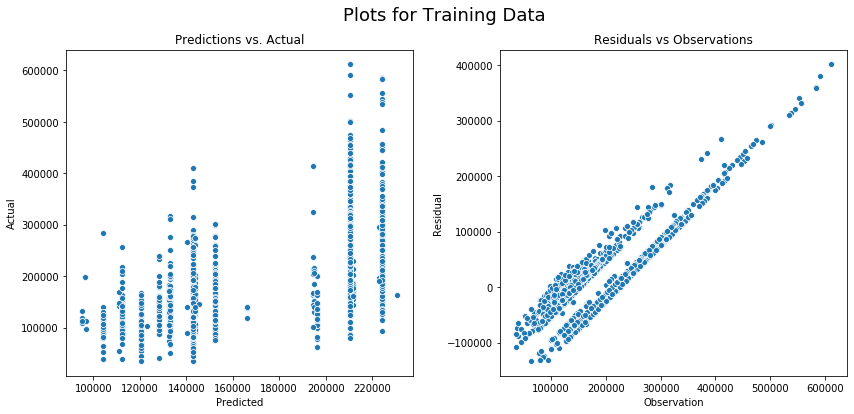

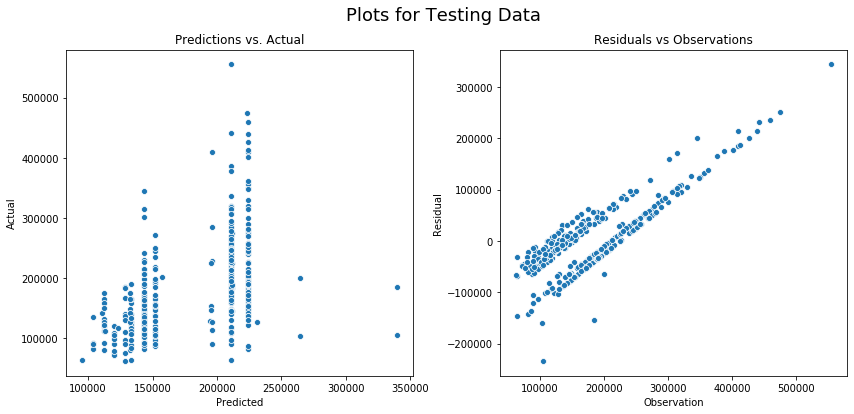

In [93]:
# now let's try house style:

lr, data_w_dum, df_kag = add_dummies_and_fit('House Style', data_ref)

The mean of residuals is:  5.183751948921366e-16
The Mean Absolute Error:  0.20880588250844262
The Sum Squared Error:  124.91654614178826
The Mean Squared Error:  0.07626162768118941
The Root Mean Squared Error:  0.2761550790428983
The Coefficient of Determination:  0.5350187969389835
The Adjusted Coefficient of Determination:  0.5327352796741043
The 5-fold cross validation score:  0.527623015058108
(0.5350187969389835, 0.5108206542226222)


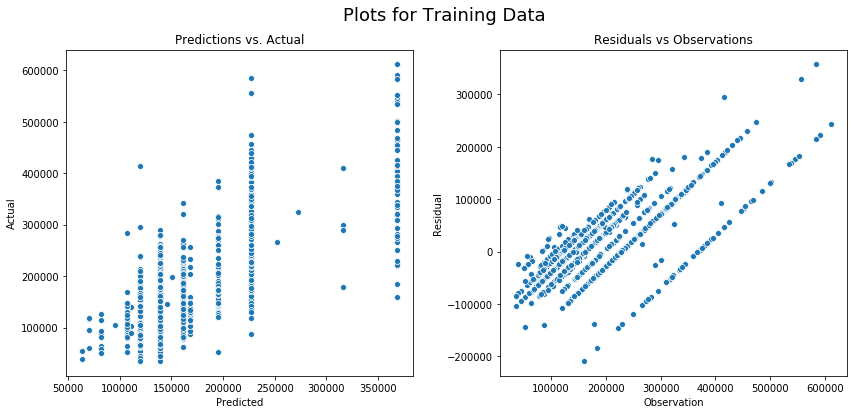

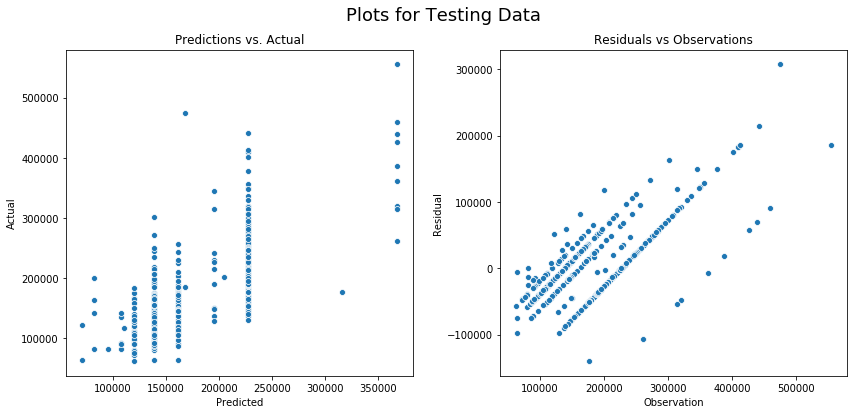

In [94]:
# incremental improvement for bias, but a slight dip in variance

# lets go ahead and drop it for now

# lets think about exterior quality:

lr, data_w_dum, df_kag = add_dummies_and_fit('Exter Qual', data_ref)

The mean of residuals is:  2.004094895733616e-15
The Mean Absolute Error:  0.2150713719468093
The Sum Squared Error:  132.50130927627708
The Mean Squared Error:  0.08089213020529737
The Root Mean Squared Error:  0.28441541836774137
The Coefficient of Determination:  0.5067857694007072
The Adjusted Coefficient of Determination:  0.4994471819646359
The 5-fold cross validation score:  0.48700725689096125
(0.5067857694007072, 0.4710460816518899)


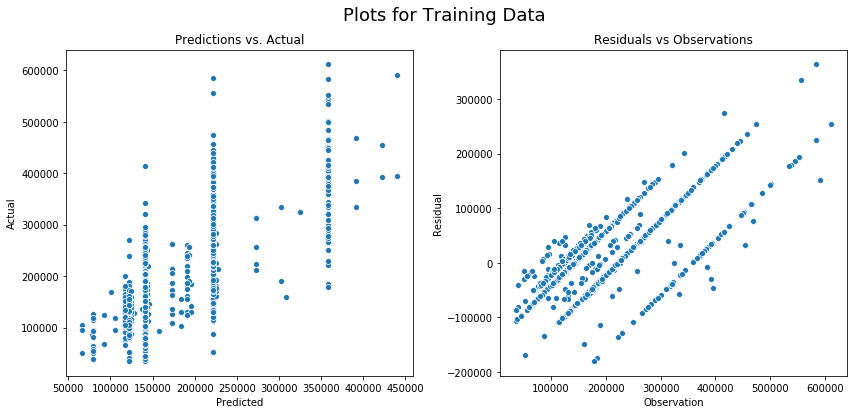

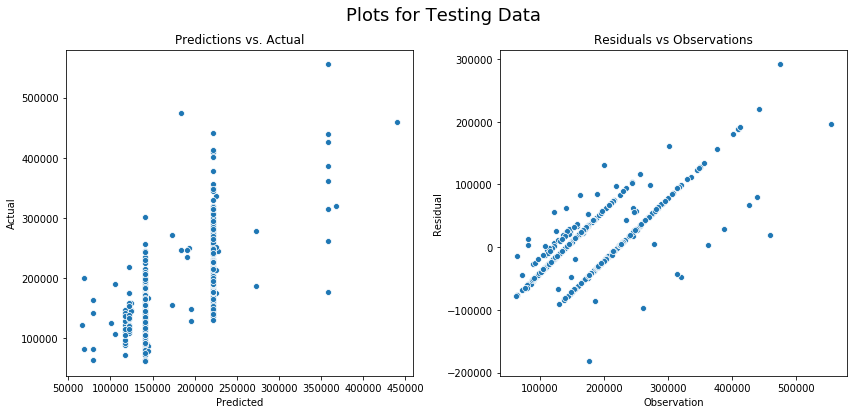

In [95]:
# definitely an improvement, let's keep it

data_ref = data_w_dum

# Lets try the ln of Year Built * Year Remod/Add 

data_all['condition'] = (data_all['Condition 1'] + data_all['Condition 2'])

lr, data_w_dum, df_kag = add_dummies_and_fit('condition', data_ref)

In [96]:
# another incremental improvement. We'll keep this one

data_ref = data_w_dum

The mean of residuals is:  8.437152753683729e-16
The Mean Absolute Error:  0.2965100765838025
The Sum Squared Error:  246.7463876645121
The Mean Squared Error:  0.15063882030800493
The Root Mean Squared Error:  0.3881221718840666
The Coefficient of Determination:  0.08152734180645549
The Adjusted Coefficient of Determination:  0.06554397671669832
The 5-fold cross validation score:  -1.350829957131193e+22
(0.08152734180645549, -1.5047020106102472e+24)


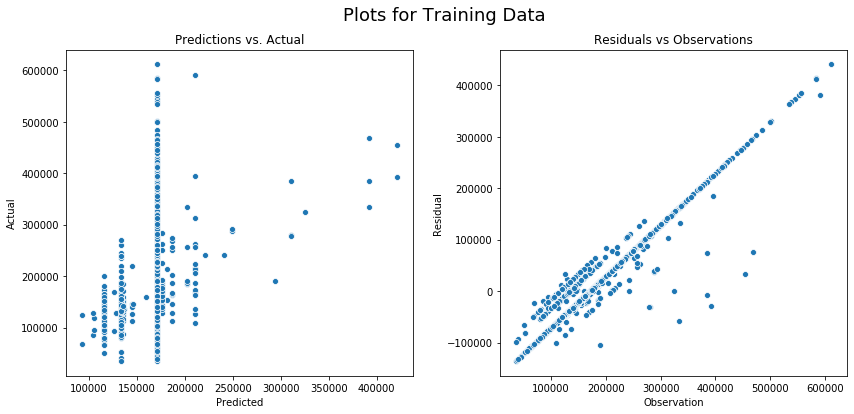

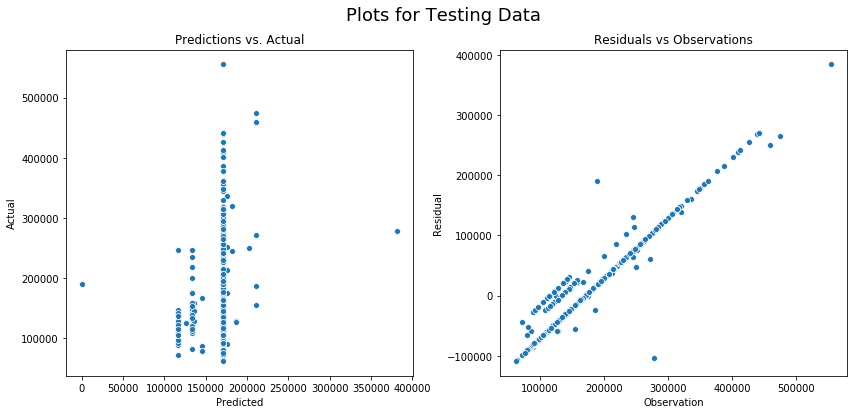

In [97]:
# lets try roof matl next:

lr, data_w_dum, df_kag = add_dummies_and_fit('Roof Matl', data_ref)

In [98]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  7.287617802667694e-16
The Mean Absolute Error:  0.218491910460775
The Sum Squared Error:  138.98369127614416
The Mean Squared Error:  0.08484962837371438
The Root Mean Squared Error:  0.29128959537497107
The Coefficient of Determination:  0.4826561734897061
The Adjusted Coefficient of Determination:  0.47915630750470417
The 5-fold cross validation score:  -2.52399654933055e+24
(0.4826561734897061, 0.47535005066804525)


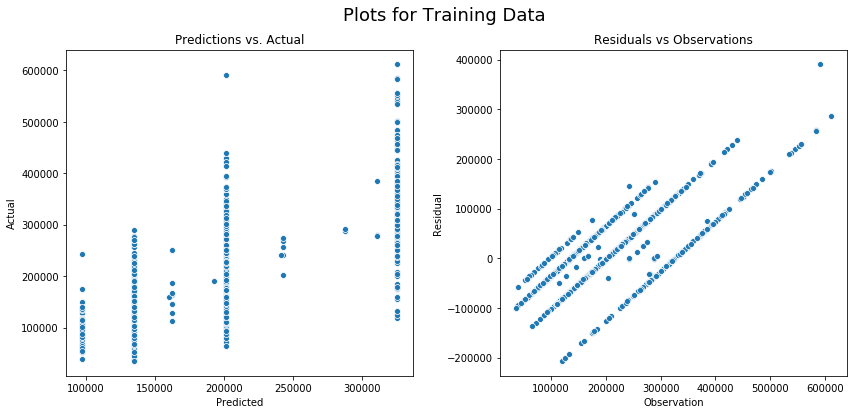

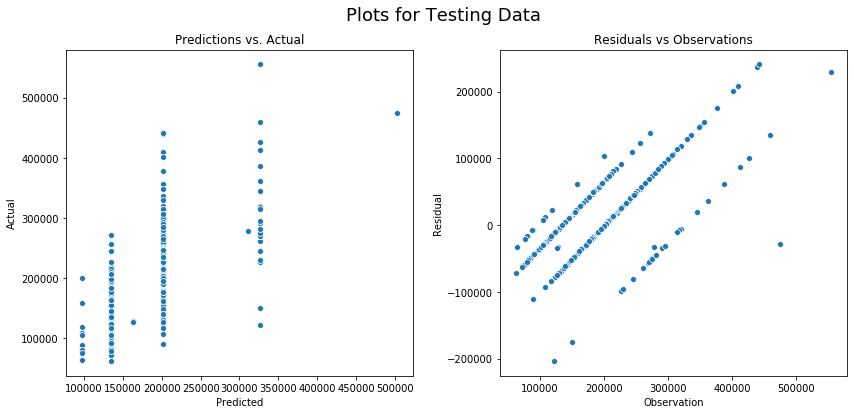

In [99]:
# lets go with Kitchen Qual next

lr, data_w_dum, df_kag = add_dummies_and_fit('Kitchen Qual', data_ref)

In [100]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.2395457066144604e-15
The Mean Absolute Error:  0.19957640197949636
The Sum Squared Error:  112.79035016932798
The Mean Squared Error:  0.06885857763695237
The Root Mean Squared Error:  0.26240917978788847
The Coefficient of Determination:  0.5801565578359924
The Adjusted Coefficient of Determination:  0.5778355560058475
The 5-fold cross validation score:  0.5714986988510122
(0.5801565578359924, 0.6008481100342274)


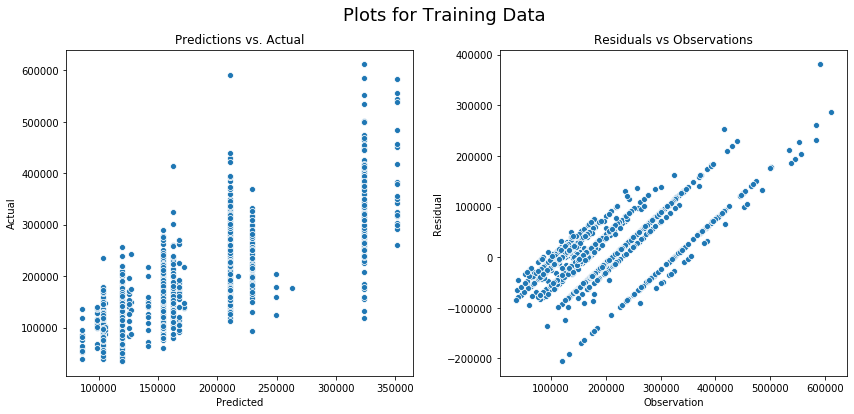

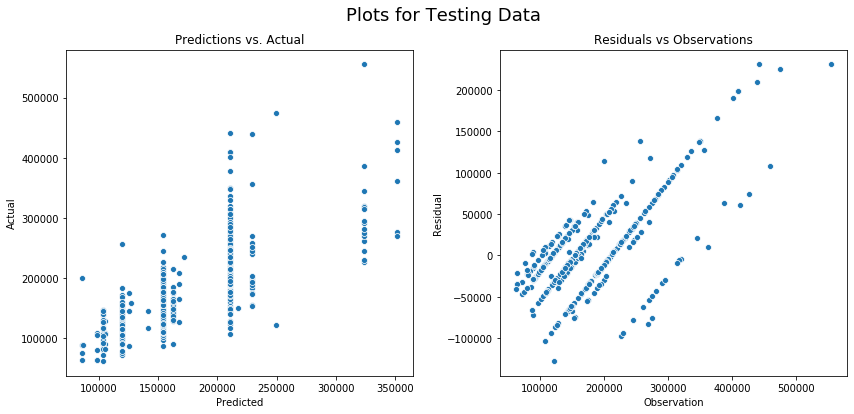

In [101]:
# Garage Type seems like a good bet

lr, data_w_dum, df_kag = add_dummies_and_fit('Garage Type', data_ref)

In [102]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.3837798089589253e-15
The Mean Absolute Error:  0.19341726806232573
The Sum Squared Error:  109.97054125400362
The Mean Squared Error:  0.06713708257265179
The Root Mean Squared Error:  0.25910824489516304
The Coefficient of Determination:  0.5906528306064663
The Adjusted Coefficient of Determination:  0.5881368676722714
The 5-fold cross validation score:  0.5793181342164774
(0.5906528306064663, 0.6428780504564667)


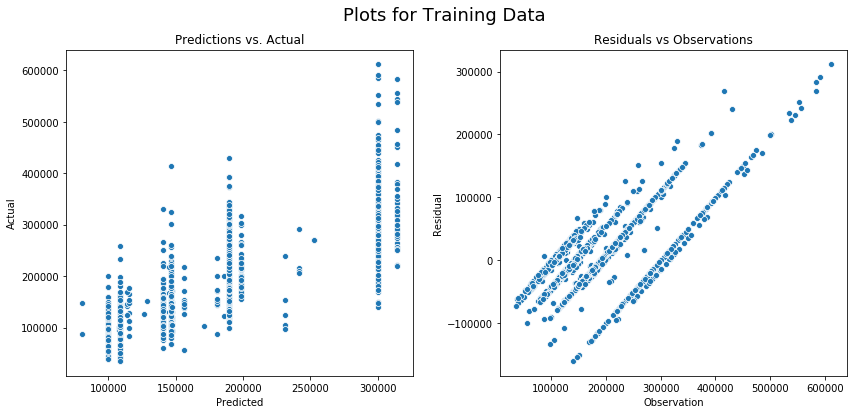

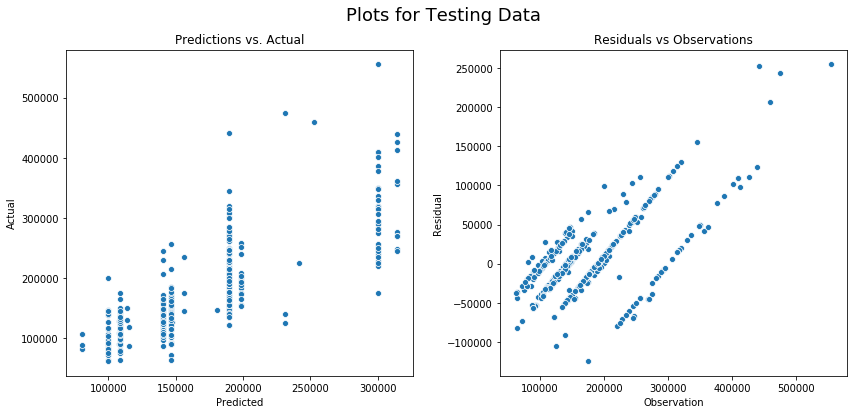

In [103]:
# Lets try garage cars

lr, data_w_dum, df_kag = add_dummies_and_fit('Garage Cars', data_ref)

In [104]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  7.211705117223239e-16
The Mean Absolute Error:  0.20709787826370413
The Sum Squared Error:  122.36860002204887
The Mean Squared Error:  0.07470610501956586
The Root Mean Squared Error:  0.27332417569539263
The Coefficient of Determination:  0.544503105372762
The Adjusted Coefficient of Determination:  0.5428274576917299
The 5-fold cross validation score:  0.5375326264267863
(0.544503105372762, 0.5506415485757473)


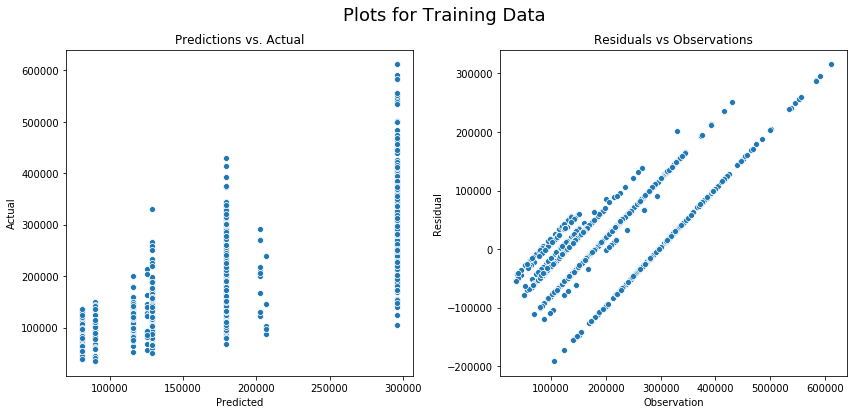

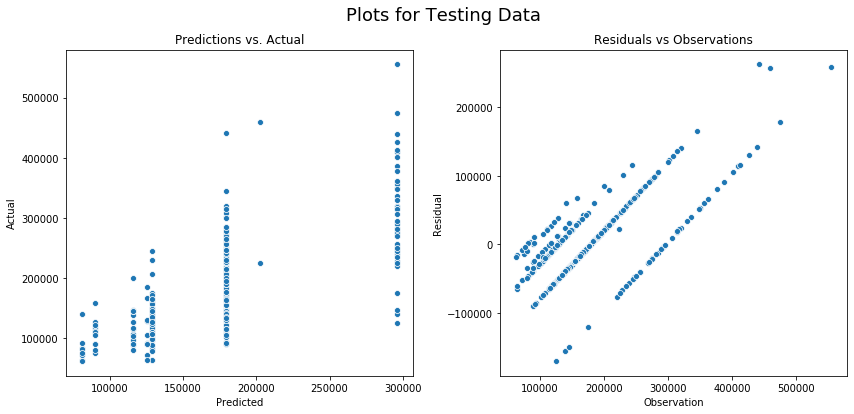

In [105]:
# Lets try ac

lr, data_w_dum, df_kag = add_dummies_and_fit('Central Air', data_ref)

In [106]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  2.2556912246352386e-15
The Mean Absolute Error:  0.25823867893183433
The Sum Squared Error:  185.20323886217386
The Mean Squared Error:  0.11306669039204753
The Root Mean Squared Error:  0.33625390762346175
The Coefficient of Determination:  0.3106115444531804
The Adjusted Coefficient of Determination:  0.3084994474692747
The 5-fold cross validation score:  0.3020004784363636
(0.3106115444531804, 0.307982756113084)


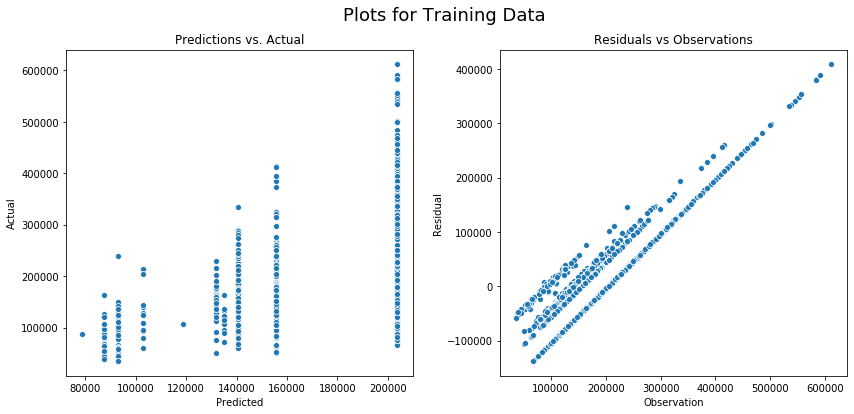

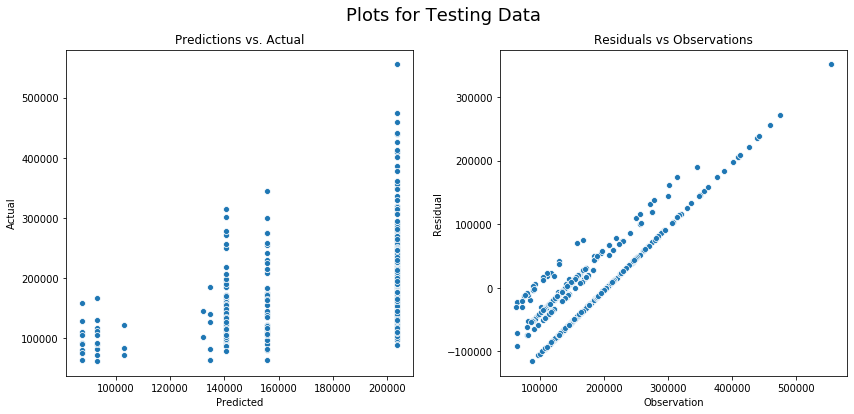

In [107]:
# Lets try heating QC

lr, data_w_dum, df_kag = add_dummies_and_fit('Heating QC', data_ref)

In [108]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

The mean of residuals is:  1.2536437767684308e-15
The Mean Absolute Error:  0.24091517049425323
The Sum Squared Error:  165.193143324189
The Mean Squared Error:  0.10085051484993224
The Root Mean Squared Error:  0.31756970077438473
The Coefficient of Determination:  0.3850958188267056
The Adjusted Coefficient of Determination:  0.37361658706864787
The 5-fold cross validation score:  0.3514995622292075
(0.3850958188267056, 0.32071697678758027)


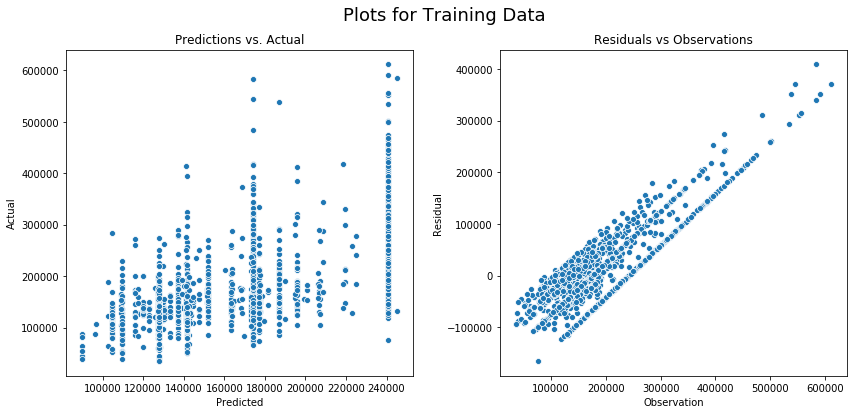

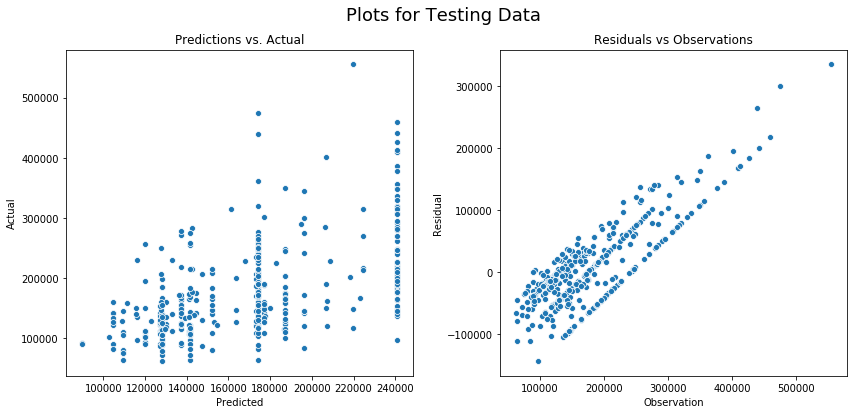

In [109]:
# Lets try basement type

data_all['basement_type'] = data_all['BsmtFin Type 1'] + data_all['BsmtFin Type 2']

lr, data_w_dum, df_kag = add_dummies_and_fit('basement_type', data_ref)

In [ ]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

In [ ]:
# how about lot shape:

lr, data_w_dum, df_kag = add_dummies_and_fit('Lot Shape', data_ref)

In [ ]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

In [ ]:
# lets try land slope

lr, data_w_dum, df_kag = add_dummies_and_fit('Land Slope', data_ref)

In [ ]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

In [ ]:
# lets try Bsmt Qual

lr, data_w_dum, df_kag = add_dummies_and_fit('Bsmt Qual', data_ref)

In [ ]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

In [ ]:
# lets try Bsmt Cond

lr, data_w_dum, df_kag = add_dummies_and_fit('Bsmt Cond', data_ref)

In [ ]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

In [ ]:
# lets try Bsmt Exposure

lr, data_w_dum, df_kag = add_dummies_and_fit('Bsmt Exposure', data_ref)

In [ ]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

In [ ]:
# lets try Yr Sold

lr, data_w_dum, df_kag = add_dummies_and_fit("Yr Sold", data_ref)

In [ ]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

In [ ]:
# lets try year remod/add

lr, data_w_dum, df_kag = add_dummies_and_fit("Fence", data_ref)

In [ ]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

In [ ]:
# lets try Misc Feature:

lr, data_w_dum, df_kag = add_dummies_and_fit("Misc Feature", data_ref)

In [ ]:
# another incremental improvement. Lets keep it

data_ref = data_w_dum

In [ ]:
# lets submit what we have and see what we get!

kag_counter = create_kaggle_csv(lr, df_kag, kag_counter)

In [ ]:
# now that we have come this far, lets do a ridge regression on the current features
# It may or may not be helpful, seeing as how so many of the variables are 
# One hot encodes. But it never hurts to try!

# first, lets get our X values set up:

df_ref = data_ref[:df_ref_rows]
df_kag = data_ref[df_ref_rows:]

In [ ]:
# now we can train test split

X = df_ref
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 42)


In [ ]:
# now we need to fit and transform our standard scaler

Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [ ]:
# now we can instantiate the model:

# we'll go with a big alpha space, cause I want to find a good score, and my computer
# can handle it =)
lasso_alphas = np.logspace(3.2, 3.25, 1_000)

lasso_final = LassoCV(alphas=lasso_alphas, cv=5, max_iter=5_000)

lasso_final.fit(Z_train, y_train)

In [ ]:
lasso_final.score(Z_train, y_train)

In [ ]:
lasso_final.score(Z_test, y_test)

In [ ]:
lasso_final.alpha_